<p>&nbsp;</p>
</p><h1 style="text-align: center;"><strong>APRESENTA&Ccedil;&Atilde;O ESTUDO</strong></h1>
<h1 style="text-align: center;"><strong>911 CALLS - Kaggle</strong></h1>
<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

### Grupo:
- Alex Abrantes
- Bruno Alves Comitre RA:183141
- Bruno Cunha

In [1]:
# Realizando Importações
%matplotlib inline
import pandas as pd
import numpy as np
import calendar
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.plotly as py
import plotly.graph_objs as go

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from matplotlib import colors
from matplotlib.font_manager import FontProperties
from folium.plugins import HeatMap
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

sns.set_style('darkgrid')
init_notebook_mode(connected=True)

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [2]:
# Lendo Dataset
df = pd.read_csv('../input/911.csv', ',')

FileNotFoundError: [Errno 2] No such file or directory: '../input/911.csv'

In [3]:
#criando variavel reason / motivos
df['Type'] = df['title'].apply(lambda s:s.split(':')[0])
df['Reason'] = df['title'].apply(lambda s:s.split(':')[1])

NameError: name 'df' is not defined

In [4]:
# Classificação das Variáveis
resposta = [["Type","Qualitativa Nominal"],["Reason","Qualitativa Nominal"],["Week","Qualitativa Nominal"],
            ["Week_Abbr","Qualitativa Nominal"],["Month","Quantitativa Discreta"],["Month_Abbr","Quantitativa Discreta"],
            ["Year","Quantitativa Discreta"],["Hour","Quantitativa Discreta"],["timeStamp","Qualitativa Ordinal"],
            ["Day","Qualitativa Ordinal"],["Date","Quantitativa Discreta"],["day/night","Qualitativa Nominal"]]

variaveis = pd.DataFrame(resposta, columns=["Variavel", "Classificação"])

In [5]:
variaveis

,Variavel,Classificação
0,Type,Qualitativa Nominal
1,Reason,Qualitativa Nominal
2,Week,Qualitativa Nominal
3,Week_Abbr,Qualitativa Nominal
4,Month,Quantitativa Discreta
5,Month_Abbr,Quantitativa Discreta
6,Year,Quantitativa Discreta
7,Hour,Quantitativa Discreta
8,timeStamp,Qualitativa Ordinal
9,Day,Qualitativa Ordinal


## Primeiros tratamentos no Dataset

In [6]:
#criando listas com os nomes da semana e os meses
wday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
months = ['','January','February','March','April','May','June','July','August','September','October','November','December']

In [7]:
#convertendo para datatime e criando as variaveis de hour / hora, day / dia, month / mes, year / ano, week / semana
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Day'] = df['timeStamp'].apply(lambda x: x.day)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Month_Abbr'] = df['timeStamp'].apply(lambda x: months[x.month])
df['Year'] = df['timeStamp'].apply(lambda x: x.year)
df['Week'] = df['timeStamp'].apply(lambda x: x.weekday())
df['Week_Abbr'] = df['timeStamp'].apply(lambda x: wday[x.weekday()])
df['Date']=df['timeStamp'].apply(lambda x:x.date())
df["day/night"] = df["timeStamp"].apply(lambda x : "night" if int(x.strftime("%H")) > 19 else "day")

NameError: name 'df' is not defined

<p>&nbsp;</p>
<h1 style="text-align: center;"><span style="color: #0000ff;"><strong>PARTE&nbsp;<span lang="pt">I</span></strong></span></h1>
<h1 style="text-align: center;"><span style="color: #0000ff;"><strong><span lang="pt">An&aacute;lise inicial explorat&oacute;ria dos Dados</span></strong></span></h1>
<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

# Estudo dos Registros de 2016 por Motivo: EMS, Fire, Traffic

In [8]:
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Year", data= df[df['Year'] == 2016], palette="viridis", hue = "Type")
plt.title("Registros das Ocorrências de 2016")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

NameError: name 'df' is not defined

In [9]:
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Month_Abbr", data= df[df['Year'] == 2016], palette="viridis", hue= "Type")
plt.title("Registros mensais das Ocorrências de 2016")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

NameError: name 'df' is not defined

In [10]:
sns.set_context("paper", font_scale = 2)
sns.countplot(x= "Week_Abbr", data= df[df['Year'] == 2016], palette="viridis", hue= "Type" )     
plt.title("Registros semanais das Ocorrências de 2016")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

NameError: name 'df' is not defined

# Quais Horários Ocorrem?

In [11]:
def timeZone(timestamp):
    hour = timestamp.hour
    if (hour > 6 and hour < 12) or hour == 6:
        return 'Morning'
    elif hour == 12:
        return 'Noon'
    elif hour > 12 and hour < 17:
        return 'Afternoon'
    elif (hour > 17 and hour < 21) or hour == 17:
        return 'Evening'
    elif (hour > 21 and hour < 6) or hour == 21:
        return 'Night'

In [12]:
df['timezone'] = df['timeStamp'].apply(lambda x : timeZone(x))  

NameError: name 'df' is not defined

In [13]:
sns.countplot('timezone', data = df[df['Year'] == 2016],palette="viridis", hue= "Type" )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Registros de Ocorrências por Horários")
plt.xticks(rotation=45)

NameError: name 'df' is not defined

In [14]:
v0 = df['timezone'].values
data = [go.Histogram(x=v0,histnorm='probability')]

layout = dict(title='Traffic: VEHICLE ACCIDENT (hr)',
            autosize= True,bargap= 0.015,height= 400,width= 500,hovermode= 'x',xaxis=dict(autorange= True,zeroline= False),
            yaxis= dict(autorange= True,showticklabels= True,))

fig1 = dict(data=data, layout=layout)
iplot(fig1)

NameError: name 'df' is not defined

# Quantidade de Ocorrências por Motivo

In [15]:
df[(df['Type']=='EMS') & (df['Year'] == 2016)].groupby('Date').count()['twp'].plot(figsize=(15,3),label='EMS')
df[(df['Type']=='Fire') & (df['Year'] == 2016)].groupby('Date').count()['twp'].plot(figsize=(15,3),label='Fire')
df[(df['Type']=='Traffic') & (df['Year'] == 2016)].groupby('Date').count()['twp'].plot(figsize=(15,3),label='Traffic')
plt.title("Vamos verificar a distribuição das diferentes razões")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

NameError: name 'df' is not defined

# Histograma

In [16]:
v0 = df[(df['title']=='Traffic: VEHICLE ACCIDENT -')].Hour.values
data = [go.Histogram(x=v0,histnorm='probability')]

layout = dict(title='Traffic: VEHICLE ACCIDENT (hr)',
            autosize= True,bargap= 0.015,height= 400,width= 500,hovermode= 'x',xaxis=dict(autorange= True,zeroline= False),
            yaxis= dict(autorange= True,showticklabels= True,))

fig1 = dict(data=data, layout=layout)
iplot(fig1)

NameError: name 'df' is not defined

# DISPERSÃO DAS OCORRÊNCIAS DE TRAFFIC

In [17]:
W1 = df[(df['Type'] == 'Traffic') & (df['Week'] == 0)].groupby(['Hour']).size().reset_index(name='Qty')
W2 = df[(df['Type'] == 'Traffic') & (df['Week'] == 1)].groupby(['Hour']).size().reset_index(name='Qty')
W3 = df[(df['Type'] == 'Traffic') & (df['Week'] == 2)].groupby(['Hour']).size().reset_index(name='Qty')
W4 = df[(df['Type'] == 'Traffic') & (df['Week'] == 3)].groupby(['Hour']).size().reset_index(name='Qty')
W5 = df[(df['Type'] == 'Traffic') & (df['Week'] == 4)].groupby(['Hour']).size().reset_index(name='Qty')
W6 = df[(df['Type'] == 'Traffic') & (df['Week'] == 5)].groupby(['Hour']).size().reset_index(name='Qty')
W7 = df[(df['Type'] == 'Traffic') & (df['Week'] == 6)].groupby(['Hour']).size().reset_index(name='Qty')

NameError: name 'df' is not defined

NameError: name 'W1' is not defined

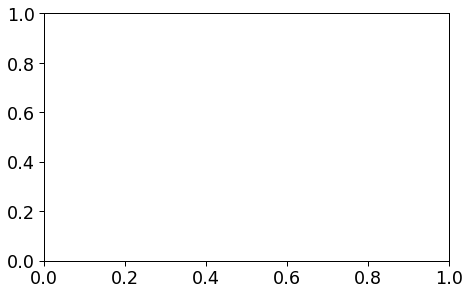

In [18]:
# Dispersion
fig, ax = plt.subplots(figsize=(16, 10))

# Set up the plot
ax = plt.subplot(2, 2, 1)

ax.scatter(W1['Hour'], W1['Qty'], label="Monday")
ax.scatter(W2['Hour'], W2['Qty'], label="Tuesday")
ax.scatter(W3['Hour'], W3['Qty'], label="Wednesday")
ax.scatter(W4['Hour'], W4['Qty'], label="Thursday")
ax.scatter(W5['Hour'], W5['Qty'], label="Friday")
ax.scatter(W6['Hour'], W6['Qty'], label="Saturday")
ax.scatter(W7['Hour'], W7['Qty'], label="Sunday")
ax.legend(loc='best')
ax.legend(bbox_to_anchor=(1.25, 1.0))
ax.set_xlabel('Timestamp (hour)', fontsize=16,)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_title('Distribution Day of Week and Types Reason: Traffic', fontsize=12, fontweight='bold')

fig.tight_layout(pad=1.5, w_pad=2, h_pad=2.0)

# Quais são os 10 principais municípios para as ocorrências de Traffic?

In [19]:
top_10_twp=pd.DataFrame(df[(df['Type']=='Traffic') & (df['Year'] == 2016)]['twp'].value_counts().head(10))
top_10_twp.reset_index(inplace=True)
top_10_twp.columns=['Township','Count']
top_10_twp

NameError: name 'df' is not defined

In [20]:
top_10_twp=pd.DataFrame(df[(df['Type']=='Traffic') & (df['Year'] == 2016)]['twp'].value_counts().head(10))
top_10_twp.reset_index(inplace=True)
top_10_twp.columns=['Township','Count']
fig2=plt.figure(figsize=(12,6))
g=sns.barplot(data=top_10_twp,x='Township',y='Count',palette="viridis")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
fig2.tight_layout()

NameError: name 'df' is not defined

<p>&nbsp;</p>
<h1 style="text-align: center;"><span style="color: #0000ff;"><strong>PARTE&nbsp;<span lang="pt">II</span></strong></span></h1>
<h1 style="text-align: center;"><span style="color: #0000ff;"><strong><span lang="pt">Estudo de Caso</span></strong></span></h1>
<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

In [21]:
df[(df['Type']=='Traffic') & (df['Year'] == 2016) & (df['Day'] == 23) & (df['Month'] == 1)].groupby('Date').count()['twp']

NameError: name 'df' is not defined

In [22]:
df[(df['Type']=='Traffic') & (df['Year'] == 2016) & (df['Day'] == 23) & (df['Month'] == 1)].groupby('Date')['twp'].value_counts().head(20)

NameError: name 'df' is not defined

In [23]:
g = df[(df.Type =='Traffic') & (df['Year'] == 2016) & (df['Day'] == 23) & (df['Month'] == 1)]
p=pd.pivot_table(g, values='e', index=['Month_Abbr'] , columns=['Hour'], aggfunc=np.sum)
p.head()
cmap = sns.cubehelix_palette(light=2, as_cmap=True)
ax = sns.heatmap(p,cmap = cmap)
ax.set_title('Vehicle  Accidents - 23 January 2016 ');

NameError: name 'df' is not defined

## Análise Geográfica

In [24]:
df_lat_lng=df[(df.Type =='Traffic') & (df['Year'] == 2016) & (df['Day'] == 23) & (df['Month'] == 1)].groupby(['lat','lng'])['lat'].count()
df_lat_lng=df_lat_lng.to_frame()
df_lat_lng.columns.values[0]='count1'
df_lat_lng=df_lat_lng.reset_index()
lats=df_lat_lng[['lat','lng','count1']].values.tolist()
hmap = folium.Map(location=[40.4, -75.2], zoom_start=9, )
hmap.add_child(HeatMap(lats, radius = 5))
hmap

NameError: name 'df' is not defined

<p>&nbsp;</p>
<h1 style="text-align: center;"><span style="color: #0000ff;"><strong><span lang="pt">CONCLUS&Atilde;O</span></strong></span></h1>
<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

Iniciamos a nossa análise exploratória em todas as ocorrências: EMS, FIRE, TRAFFIC, durante o período de 2016.

Em seguida, usamos a análise exploratória de dados para descobrir alguns aspectos interessantes, um fato que nos chamou atenção foram as ocorrências do dia 23 de Janeiro de 2016, devido ao alto indíce de acidente na presente data.

Isto nos levou a analisar, o porque de tantas ocorrências. Buscamos informações no Google referente ao clima daquele dia, e identificamos que houve uma Nevasca, e por esse motivo ocasionou vários problemas de trânsito. Notamos que nos outros dias que não houveram Nevasca, a frequência de ocorrências foram bem menores.

Outra análise relevante é a questão do horário, sendo a maior parte as ocorrências partiram das 07:00, onde é o horário que as pessoas vão para o trabalho/escola, e as 18:00, horário de Rush, ou seja, horário de fim de expediente. 

Ao acessar o site: [Janeiro 2016 Weather in Philadelphia — Graph](https://www.timeanddate.com/weather/usa/philadelphia/historic?month=1&year=2016), você verá que no dia 23 de Janeiro de 2016 ocorreu uma Nevada em Philadelphia. 

Por esse motivo no dataset temos um nível elevado de TRAFFIC, justamente no dia 23 de Janeiro de 2016.

##### VERSÕES INSTALADAS


In [25]:
pd.show_versions ()


INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.6.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.49+
Version          : #1 SMP Mon Nov 30 19:42:49 PST 2020
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : C.UTF-8
LANG             : C.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.18.5
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.3.1
setuptools       : 46.1.3.post20200325
Cython           : 0.29.21
pytest           : 5.4.1
hypothesis       : 5.10.0
sphinx           : 3.0.2
blosc            : None
feather          : 0.4.1
xlsxwriter       : 1.2.8
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.13.0
pandas_datareader: 0.9.0
bs4              : 4.9.0
bottleneck       : 1.3.2
fsspec